# Analysing and plotting pyOM data

## Loading the python modules

In [2]:
#import modules
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy import signal

# equivalent to rcParams['animation.html'] = 'html5'
#rc('animation', html='html5')

## Defining functions for plotting

In [44]:
#define functions for plotting
def animate(i):
    vec = ax.pcolor(v[i,-1,:,:])
    ax.quiver(x,y[:],u[i,-1,:,:],v[i,-1,:,:])
    time_text.set_text('time: %.1f s'%t[i])
    vec = plt.gca()
    return (vec,time_text)

def quiver(x,y,u,v):
    '''makes a quiver plot of a given velocity field'''
    fig, ax = plt.subplots(figsize=(12,12))
    vec = ax.quiver(x,y,u,v,alpha = 0.5)
    plt.title('Velocity Quiver Plot')
    plt.xlabel('Length [cm]')
    plt.ylabel('Width [cm]')
    return fig,ax,vec

def animate_quiver(x,y,t,u,v):
    '''Animates A quiver plot of a velocity field'''
    fig, ax,vec = quiver(x,y,u[0,-1,:,:],v[0,-1,:,:])
    anim = animation.FuncAnimation(fig, animate, blit=False, frames = t.shape[0])
    HTML(anim.to_html5_video())
    return anim

def load_data(fname):
    data = xr.open_dataset("C:\\Users\\IngoScr33n\\MSc Ocean Physics\\Ocean Processes\\Experiment\\CDF Files\\"+fname)
    u = np.array(data['u'])*10**2
    v = np.array(data['v'])*10**2
    x = np.array(data['xu'])*10**5
    y = np.array(data['yu'])*10**5
    time = np.array(data['Time'])*10**5
    h = np.array(data['ht'])*10**2
    return x,y,u,v,time,h

#calculate wavelength of rossby wave
def wavelen(u,omega,slope,H0):
    return np.sqrt(4*np.pi**2*u*H0/(2*omega/60*slope*2*np.pi))

## Analysis of the first file

In [45]:
fname = 'tank_long'
#fname = 'slow_narrow_ridge'
x,y,u,v,t,h= load_data(fname+'.cdf')
h0 = np.max(h)
u0 = 0.001
omega = 15
alpha = 0.2
print(np.nanmax(x))
print(np.nanmax(u))
print(h0)

78.99999618530273
0.1
39.999996


In [46]:
#animate_quiver(x,y,t,u,v)

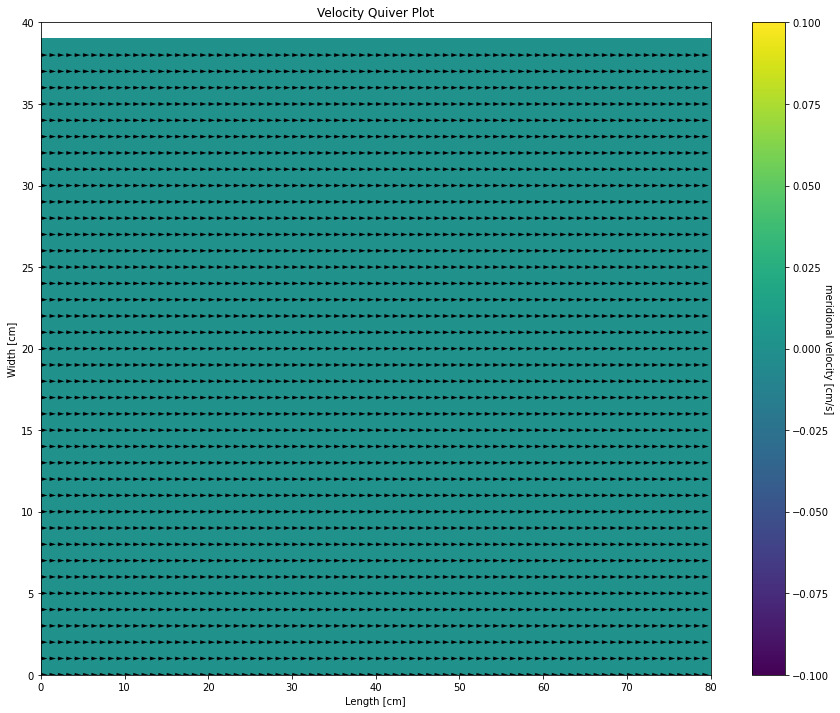

In [47]:
#surface animation
fig, ax = plt.subplots(figsize=(15,12))
vec = ax.pcolor(v[0,-1,:,:])
ax.quiver(x,y[:],u[0,-1,:,:],v[0,-1,:,:])
time_text = ax.text(70,39.4,"",color='r')
cbar = plt.colorbar(vec)
cbar.set_label('meridional velocity [cm/s]', rotation=270)
plt.title('Velocity Quiver Plot')
plt.xlabel('Length [cm]')
plt.ylabel('Width [cm]')
#plt.savefig("Figures\\"+fname+'.png')
anim = animation.FuncAnimation(fig, animate, blit=False,frames=v.shape[0])


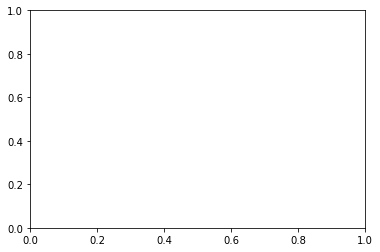

In [48]:
HTML(anim.to_html5_video())
rc('animation', html='html5')
anim


C:\Users\IngoScr33n\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 80, using nperseg = 80
  warnings.warn('nperseg = {0:d} is greater than input length '


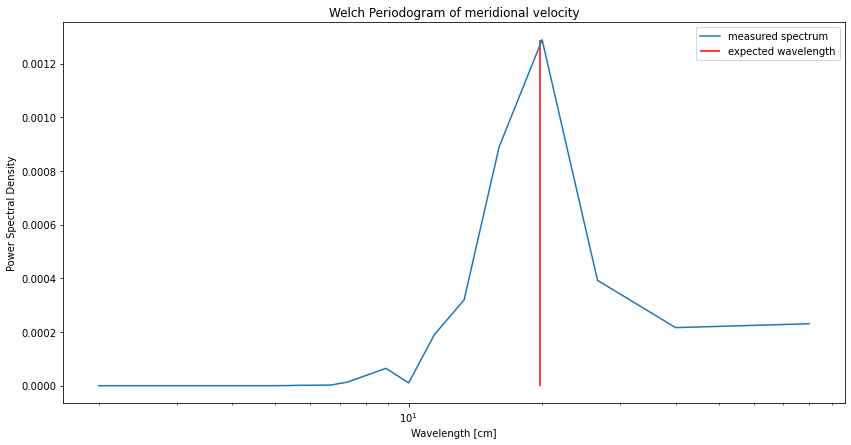

In [15]:
freq,power = signal.welch(np.nanmean(v[-1,-1,:-1,:],axis=0))
lambda_ = wavelen(u0,omega,alpha,h0)
lambda_ = 19.8
plt.figure(figsize=(14,7))
plt.semilogx(1/freq[1:],power[1:],label='measured spectrum')
plt.vlines(lambda_,0,max(power),'red',label='expected wavelength')
plt.legend()
plt.xlabel('Wavelength [cm]')
plt.ylabel('Power Spectral Density')
plt.title('Welch Periodogram of meridional velocity')
plt.savefig(fname+'_spec.png')

<ipython-input-52-3f8e551276c5>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x,y,np.sqrt(v[-1,-1,:,:]**2+u[-1,-1,:,:]**2))


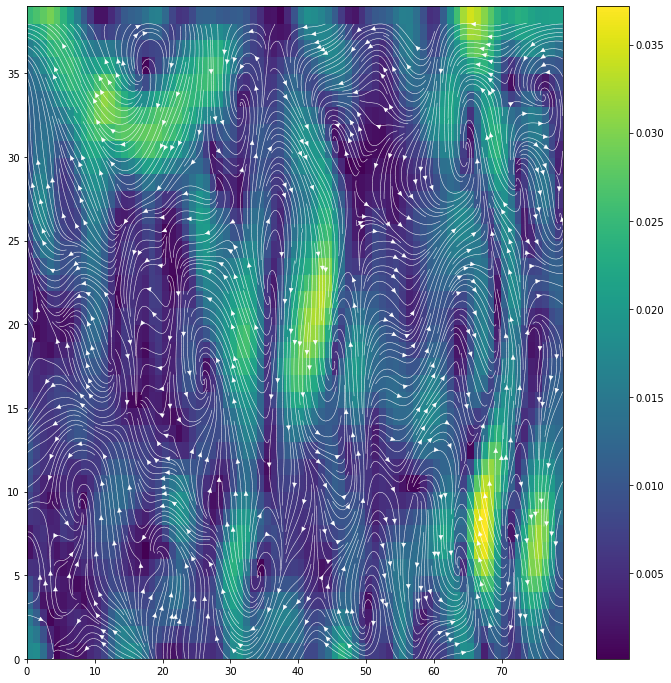

In [52]:
plt.figure(figsize=(12,12))
plt.pcolor(x,y,np.sqrt(v[-1,-1,:,:]**2+u[-1,-1,:,:]**2))
plt.colorbar()
plt.streamplot(x,y,u[-1,-1,:,:],v[-1,-1,:,:],density=5,linewidth=0.5,color='white')
